# Recommend movies based on Genres

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
anime = pd.read_csv("C:\\Users\\Swathi\\Desktop\\Excelr Classes\\Assignments\\9.Recommendation system\\anime.csv")
anime.head()

# use ...'\\'...or ....r"C:\user\...  for (unicode error) 'unicodeescape' error

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


# Raw strings in python (r):
raw strings are raw string literals that treat backslash (\) as a literal character. 
For example, if we try to print a string with a “\n” inside, it will add one line break. 
But if we mark it as a raw string, it will simply print out the “\n” as a normal character. 
Python raw strings are useful for writing regular expressions and for using with SQL parsers.

#  2. Understand the data

In [3]:
print("Number of rows: ", len(anime))
print("Number of columns: ",len(anime.columns))
print("Number of rows and columns: ",anime.shape)
print("Number of elements: ",anime.size)
# print("Number of rows, columns, etc: ", anime.info())
print ("\nIdentify outliers & other info like Mean,median,max,min etc:\n\n",anime.describe())

Number of rows:  12294
Number of columns:  7
Number of rows and columns:  (12294, 7)
Number of elements:  86058

Identify outliers & other info like Mean,median,max,min etc:

            anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000     10.000000  1.013917e+06


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF: TF= Term Frequency; IDF= Inverse Document Frequency

1. Used to vectorize text data
2. Most used and import tchnique in analysing text data
3. Captures important 'word' in sentence
4. Captures important 'word' in corpus as well.

TF = No of repeatation of word in a document / Total no of words in a document
[captures importance of the word in a document]

IDF = LOG (No of documents/No of documents containing the word)
[captures importance of the word in a corpus]

TFIDF = TF * IDF


In [5]:
tfidf = TfidfVectorizer(stop_words = 'english')

#stop words in english are predefined. egs: The/is/a/in/but etc

In [6]:
# There are few balnk values (nan) in column 'Genre' ; fill nan with space i.e. " " 
anime["genre"].isnull().sum() 
anime["genre"] = anime["genre"].fillna(" ")

In [7]:
# using below code we convert data into vectoriztion

tfidf_matrix = tfidf.fit_transform(anime.genre)

print("Shape of Original DF : ",anime.shape)
print("Shape of TFIDF Matrix: ",tfidf_matrix.shape)

Shape of Original DF :  (12294, 7)
Shape of TFIDF Matrix:  (12294, 46)


Shape of TFIDF Matrix:  (12294, 46) Suggest we have converted 12294 rows of 'Genere' into 46 columns of vector representation


# Find Similarity

Performed mostly using cosine similarity formula

=> cos(A,B)= AXB / |A|X|B|

where, 

A*B = a1*b1+a2*b2+....+an*bn

|A| = SQRT(a1^2+a2^2+.....+an^2

|B| = SQRT(b1^2+b2^2+.....+bn^2

a & b = users/products etc

Note: range of cosine similarity is 0 to 1

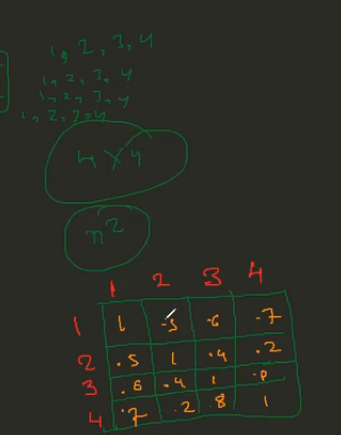

In [8]:
# This is item to item recoomendation which happens offline

from sklearn.metrics.pairwise import linear_kernel
cosine_sim_matrix = linear_kernel(tfidf_matrix,tfidf_matrix) # cos_sim_matrix is obtained by matrix * matrix
# print(cosine_sim_matrix)

In [9]:
# Arrange data / data wrangling

# 1. Remove duplicate movies

anime_index = pd.Series(anime.index, index = anime['name']).drop_duplicates()
anime_index.head()

name
Kimi no Na wa.                      0
Fullmetal Alchemist: Brotherhood    1
Gintama°                            2
Steins;Gate                         3
Gintama&#039;                       4
dtype: int64

In [10]:
anime_index[5]

5

# create a function for recommending movies

Input = Movie Name

Output = Top N Recommended Movies 

In [17]:
def get_anime_recommendations(Name,topN):
    #1:get movie index(id) using its title bcz user will enter movie name not index number
    anime_id = anime_index[Name]  
    print(anime_id)
    
    #2: getting the pair wise similarity score of all the movies with that of enterted movie; here enumerate act as counter
    cosine_scores = list (enumerate(cosine_sim_matrix[anime_id])) 
    #print(cosine_scores)
    
    #3: Sorted the obtained score; sort lamda x:x[1] means in dictionary x = [12293(x[0]movie id),0.0(x[1]cosine score)],we shall sort on cosine score
    cosine_scores = sorted(cosine_scores, key=lambda x:x[1], reverse = True)
    #print(cosine_scores)
    
    #4: slice the sorted list as per user input (topN); it can top5,top10 or anything
    cosine_score_TopN = cosine_scores[0:topN]
    #print(cosine_score_TopN)
    
    #5:above will give only index number not the movie name. but customer requires movie name
    # Getting movie index from the top 10 sorted list X[0]= Movie id and X[1] is similarity score
    anime_idx = [i[0] for i in cosine_score_TopN]
    anime_scores = [i[1] for i in cosine_score_TopN]
    
    #6. Create dataframe to store the similar movie list
    anime_similar_show = pd.DataFrame(columns=["name","Score"])
    #7. Put the topN data into dataframe
    
    anime_similar_show["name"] = anime.loc[anime_idx,"name"] # using anime index we fetch movie name from anime
    anime_similar_show["Score"]=anime_scores

    #print("Before Reset:",anime_similar_show)
    anime_similar_show.reset_index(inplace=True) # this will show anime_idx value as seperate columns
    #print("After Reset:",anime_similar_show)
    anime_similar_show.drop(["index"],axis=1,inplace=True)
    
    #8.OutPut
    return anime_similar_show


# Enter data and Get output

In [18]:
Top_N_Movies = get_anime_recommendations("Haikyuu!! Second Season",5)
print(Top_N_Movies)

14
                                                name  Score
0  Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...    1.0
1                            Haikyuu!! Second Season    1.0
2                                          Haikyuu!!    1.0
3                                          Slam Dunk    1.0
4               Haikyuu!! Movie 1: Owari to Hajimari    1.0
